In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [30]:
#Leer dataframe
trainFrame = pd.read_csv('train.csv')

In [17]:
trainFrame.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
#La mayoría de las variables son categoricas
trainFrame.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [33]:
trainFrame.isnull().sum().sort_values(ascending=False) #datos nulos por columna

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [34]:
trainFrame = trainFrame.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [35]:
trainFrame.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageFinish      81
GarageType        81
GarageCond        81
GarageQual        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
RoofStyle          0
RoofMatl           0
SalePrice          0
Exterior1st        0
Exterior2nd        0
YearBuilt          0
ExterQual          0
ExterCond          0
Foundation         0
YearRemodAdd       0
BldgType           0
OverallCond        0
OverallQual        0
HouseStyle         0
Condition2         0
Condition1         0
                ... 
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
BsmtUnfSF          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr 

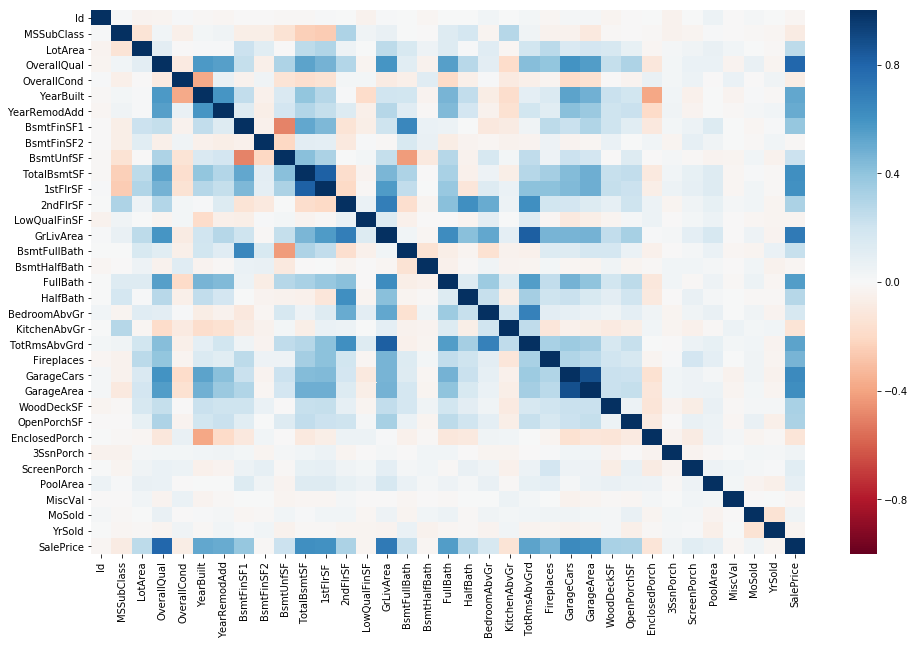

In [26]:
plt.figure(figsize=(16,10))
sns.heatmap(trainFrame.corr(), cmap='RdBu', vmin=-1, vmax=1); #Matriz de relacion para variables numericas

In [37]:
most_corr = pd.DataFrame(trainFrame.corr()['SalePrice'].sort_values(ascending=False))
most_corr = most_corr[(most_corr['SalePrice']>0.5)]
most_corr #Obtenemos las columnas con mayor correlacion

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [15]:
x = sm.add_constant(houses[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']]) 

y = houses['SalePrice']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print_model

C:\Users\Eduardo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:43:46   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187      0.000   -1.44e+06   -9.33e+05
OverallQual    1.96e+04   1190.159     16.472      0.000    1.73e+04    2.19e+04
GrLivArea       51.2971      4.233     12.119      0.000      42.994      59.600
GarageCars    1.042e+04   3044.272      3.422      0.001    4446.249    1.64e+04
GarageArea      14.9475     10.311      1.450      0.147      -5.279      35.174
TotalBsmtSF     19.8651      4.295      4.625      0.000      11.439      28.291
1stFlrSF        14.1737      4.930      2.875      0.004       4.504      23.844
FullBath     -6790.8715   2682.369     -2.532      0.011   -1.21e+04   -1529.130
TotRmsAbvGrd    33.1051   1119.061      0.030      0.976   -2162.048    2228.258
YearBuilt      268.2407     50.346      5.328      0.000     169.481     367.000
YearRemodAdd   296.4812     63.635      4.659      0.000     171.655     421.307
==============================================================================
Omnibus:                      477.814   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58906.279
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                      34.107   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

La R cuadrada es de 0.774, por lo que es relativamente representativa de los datos analizados. El p-value es 0, por lo que  las variables señaladas tiene un muy alta significancia conforme al valor del precio. Son las que mayormente lo afectan.

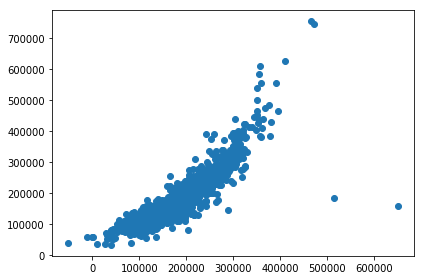

In [58]:
plt.scatter(predictions, y)
plt.tight_layout()